<div align="left">
<img align="left" src="../misc/cinlogo.jpg" height="60" width="60" >
<div> <b> UNET </b> </div>
<div> Pedro D. Marrero Fernandez</div>
<div> :), :(, :/</div>
</div>        

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import csv

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from skimage import io, transform
from skimage import color
import scipy.misc
import scipy.ndimage as ndi

from pytvision import visualization as view
from pytvision.transforms import transforms as mtrans

sys.path.append('../')
from torchlib.datasets.dsxbdata import DSXBExDataset, DSXBDataset
from torchlib.datasets import imageutl as imutl
from torchlib import utils

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [12]:
pathdataset      = os.path.expanduser( '~/.datasets' )
namedataset      = 'cambiaext'
sub_folder       = 'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'touchs'
folders_weights  = 'weights'

pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.dsxbExProvide(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    folders_contours,
    folders_weights,
    'png'
    )

print(len(dataloader))
print(':)!!!')


10
:)!!!


9
0 255 (1024, 1024)
0 255 (1024, 1024)
0 0 (1024, 1024)
1.502 11.304 (1024, 1024)


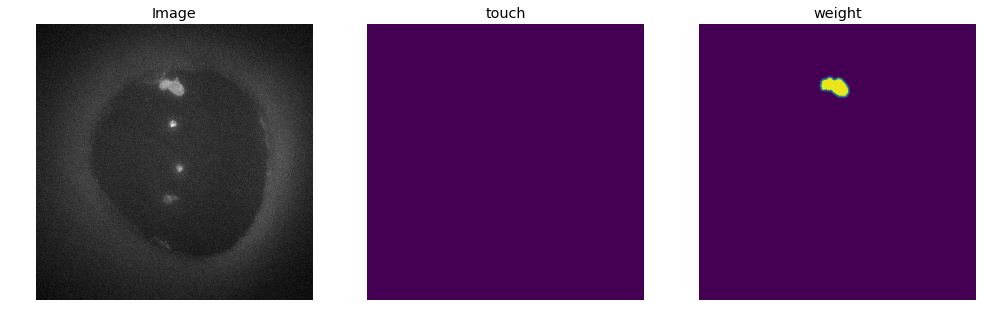

In [15]:
def summary( data ):
    print(np.min(data), np.max(data), data.shape  )

i = np.random.randint( len(dataloader) )
image, label, touch, weight = dataloader[i]

print(i)
summary(image)
summary(label)
summary(touch)
summary(weight)

plt.figure( figsize=(15,15) )
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(touch)
plt.title('touch')
plt.axis('off')
plt.subplot(133)
plt.imshow(weight)
plt.title('weight')
plt.axis('off')
#plt.colorbar()

plt.show()


In [5]:
## estadisticas ....

# DATA LOADER 

0 torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
tensor(1.00000e-02 *
       1.5686) tensor(0.8745) torch.Size([256, 256])
tensor(0.) tensor(1.) torch.Size([256, 256])
tensor(-804.2600) tensor(1.5010) torch.Size([256, 256])
1 torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
tensor(1.00000e-02 *
       2.3529) tensor(0.8706) torch.Size([256, 256])
tensor(0.) tensor(1.) torch.Size([256, 256])
tensor(-9774.7109) tensor(1.5010) torch.Size([256, 256])


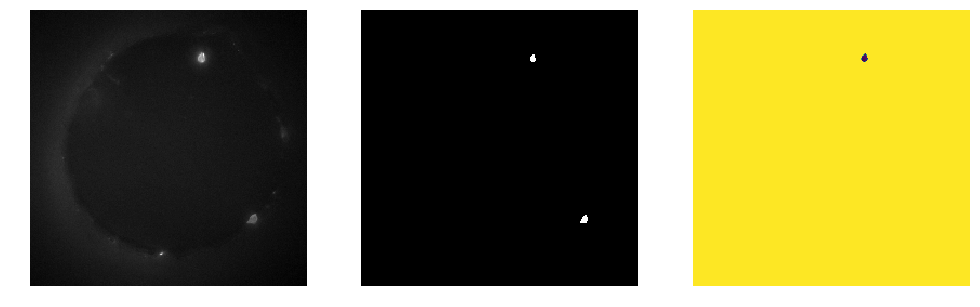

In [6]:
import cv2

pathdataset      = os.path.expanduser( '~/.datasets' )
namedataset      = 'cambiaext'
sub_folder       = 'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'touchs'
folders_weights  = 'weights'
size_input       = 256

base_folder = os.path.join(pathdataset, namedataset) 

data = DSXBDataset(
        base_folder, 
        sub_folder, 
        folders_contours=folders_contours,
        transform=transforms.Compose([ 
            mtrans.ToResize( (256,256), resize_mode='squash', padding_mode=cv2.BORDER_REFLECT_101 ),
            #mtrans.ToResizeUNetFoV(imsize, cv2.BORDER_REFLECT_101),                                        
            mtrans.ToTensor(),
            mtrans.ToNormalization(),        
        
        ])
    )

dataloader = DataLoader(data, batch_size=4, shuffle=False, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,1,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 1: 
        
        plt.figure( figsize=(15,15) )
        plt.subplot(131)
        plt.imshow(image,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(132)
        plt.imshow(label,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(133)
        plt.imshow(weight)
        plt.axis('off')
        plt.ioff()
        
        
        plt.show()        
        
        
        break

# DATA AUMENTATION

0 torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
tensor(1.00000e-02 *
       3.5294) tensor(0.8745) torch.Size([256, 256])
tensor(0.) tensor(1.) torch.Size([256, 256])
tensor(-6284.2700) tensor(10.5323) torch.Size([256, 256])


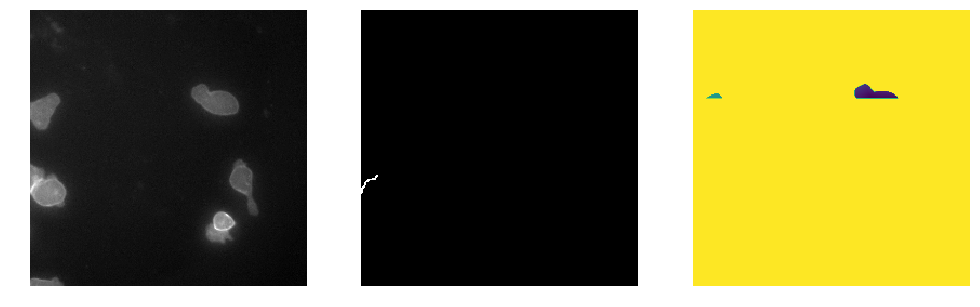

1 torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
tensor(1.00000e-02 *
       2.7451) tensor(0.7059) torch.Size([256, 256])
tensor(0.) tensor(1.) torch.Size([256, 256])
tensor(1.) tensor(10.3064) torch.Size([256, 256])


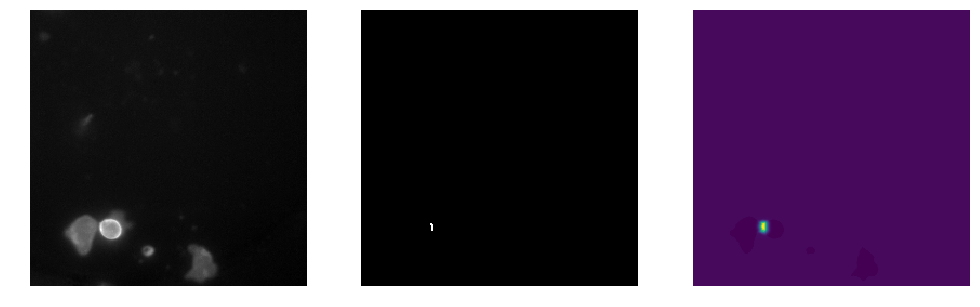

2 torch.Size([2, 3, 256, 256]) torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])
tensor(1.00000e-02 *
       3.5294) tensor(0.7725) torch.Size([256, 256])
tensor(0.) tensor(1.) torch.Size([256, 256])
tensor(-621.1672) tensor(10.4286) torch.Size([256, 256])


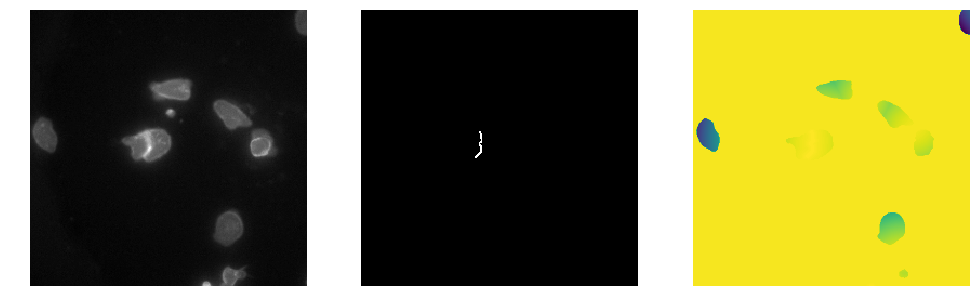

In [10]:

data = DSXBDataset(
        base_folder, 
        sub_folder, 
        folders_contours=folders_contours,
        transform=transforms.Compose([
              mtrans.RandomCrop( (500,500), limit=50, padding_mode=cv2.BORDER_CONSTANT  ),
              mtrans.ToResize( (256,256), resize_mode='squash', padding_mode=cv2.BORDER_REFLECT_101 ),
              #mtrans.ToResizeUNetFoV(size_input, cv2.BORDER_CONSTANT),
              #mtrans.ToRandomTransform( mtrans.ToGaussianBlur(), prob=0.5 ),                                         
              mtrans.ToTensor(),
              #mtrans.RandomElasticTensorDistort( size_grid=10, deform=0.05 ),
              mtrans.ToNormalization(), 
            ])
        )

dataloader = DataLoader(data, batch_size=4, shuffle=True, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()
    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,2,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 4: 
        break
        
    plt.figure( figsize=(15,15) )
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(132)
    plt.imshow(label, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    plt.imshow(weight)
    plt.axis('off')
    plt.ioff()       

    plt.show()        
        